In [ ]:
import os
import numpy as np
import tensorflow as tf
import shutil
import glob as glob
import cv2
import matplotlib.pyplot as plt
import random


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

!unzip /content/drive/MyDrive/10_comps_Fe_Cr.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_50.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_60.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_70.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_80.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_90.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_100.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_110.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_120.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_130.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_140.00.png  
  inflating: /content/10comps_Fe_Cr/phase_field_data/0.55%_360/output_150.00.png  
  inflating: /content/10comps_Fe_Cr/phase

In [ ]:
#using 500 images from 0.45%,0.5
train_images_list = []

compositions = ['0.3%_360', '0.58%_360']
for i in range(0,2):
  comp = compositions[i]
  X_train = glob.glob("/content/10comps_Fe_Cr/phase_field_data/" + comp +"/*.png")
  X_train = X_train[20:520]
  for img in X_train:
    train_images_list.append(img)

#printing the number of images
print(len(train_images_list))
#1k images

#printing the dimensions
img = cv2.imread(train_images_list[0])
dims = img.shape
print(dims)


1000
(256, 256, 3)


In [ ]:

#Reshaping the image into proper input dormat for the autoencoder

from PIL import Image
train_images= []

for i,path in enumerate(train_images_list):
  image = cv2.imread(train_images_list[i],cv2.COLOR_BGR2RGB)
  img = np.array(image)
  img = img.astype("float32") / 255
  train_images.append(img)

print(len(train_images))
print(train_images[0].shape)

1000
(256, 256, 3)


In [ ]:

train_images = np.array(train_images)

In [ ]:

print(train_images.shape)
print(train_images[0])

(1000, 256, 256, 3)
[[[0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  ...
  [0.7176471  0.7058824  0.68235296]
  [0.7176471  0.7058824  0.68235296]
  [0.7176471  0.7058824  0.68235296]]

 [[0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  ...
  [0.7176471  0.7058824  0.68235296]
  [0.7176471  0.7058824  0.68235296]
  [0.7176471  0.7058824  0.68235296]]

 [[0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  ...
  [0.7176471  0.7058824  0.68235296]
  [0.7176471  0.7058824  0.68235296]
  [0.7176471  0.7058824  0.68235296]]

 ...

 [[0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  ...
  [0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]
  [0.72156864 0.70980394 0.68235296]]

 [[0.72156864 0.70980394 0.68235296]
  [0.72156864 0.7


**Normalizing, Pre-Processing and Plotting the images**

(1000, 256, 256, 3)
(900, 256, 256, 3)
(100, 256, 256, 3)


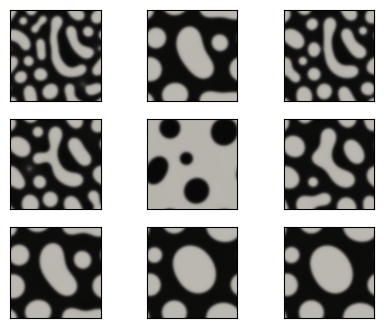

In [ ]:
# train_images = np.array(train_images)
# train_images = train_images.astype('float32')/255.0
print(train_images.shape)




from sklearn.model_selection import train_test_split

#dividing into train and test sets

train_data, test_data = train_test_split(train_images, train_size=0.9, test_size=0.1, random_state=42, shuffle=True)
print(train_data.shape)

print(test_data.shape)


#plotting the figures of the train set

plt.figure(figsize=(5,4))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data[i])
plt.show()


# **Auto-Encoder model**


In [ ]:

from tensorflow.keras import layers, models
from functools import partial
import matplotlib.pyplot as plt
import cv2

from google.colab.patches import cv2_imshow

In [ ]:
import gc

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

gc.collect()

49158

In [ ]:
tf.keras.backend.clear_session()

NameError: ignored

In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras import backend as K

# Do some code, e.g. train and save model

K.clear_session()

In [ ]:
from tensorflow.keras import backend as K

def sinlu(x):

    return x * K.sin(x)

In [ ]:
func = tf.keras.layers.LeakyReLU()


In [ ]:
# from keras.layers.preprocessing import string_lookup
model = tf.keras.Sequential()

#Designing the encoder section of the model

model.add(tf.keras.layers.Conv2D(input_shape = (256,256,3), filters= 128, kernel_size = (5,5), activation='sigmoid', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='sigmoid', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='sigmoid', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='sigmoid', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

# (32,32,8)


#Deigning the Decoder section of the model

model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='sigmoid', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='sigmoid', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='sigmoid', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5),  activation='sigmoid', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), activation='relu', padding='same'))

NameError: ignored

In [ ]:

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0

In [ ]:

# Define some callbacks to improve training.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

checkpoint_filepath = '/content/drive/MyDrive/Image_reconstruction_models/99%_model/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)




history = model.fit(train_data,
                    train_data,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=8,
                    verbose=1,
                    shuffle=True,
                    callbacks=[model_checkpoint_callback,early_stopping, reduce_lr])


Epoch 1/100
90/90 [==============================] - 14s 114ms/step - loss: 0.1646 - accuracy: 0.5921 - val_loss: 0.1555 - val_accuracy: 0.0041 - lr: 0.0010
Epoch 2/100
90/90 [==============================] - 10s 106ms/step - loss: 0.1534 - accuracy: 0.5578 - val_loss: 0.1659 - val_accuracy: 0.9909 - lr: 0.0010
Epoch 3/100
90/90 [==============================] - 10s 107ms/step - loss: 0.1504 - accuracy: 0.7650 - val_loss: 0.1482 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 4/100
90/90 [==============================] - 9s 105ms/step - loss: 0.1348 - accuracy: 0.7680 - val_loss: 0.1057 - val_accuracy: 0.9744 - lr: 0.0010
Epoch 5/100
90/90 [==============================] - 10s 110ms/step - loss: 0.1009 - accuracy: 0.9625 - val_loss: 0.0990 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 6/100
90/90 [==============================] - 9s 104ms/step - loss: 0.0966 - accuracy: 0.9888 - val_loss: 0.0982 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 7/100
90/90 [==============================] - 10s 108

In [ ]:

model.load_weights('/content/drive/MyDrive/Image_reconstruction_models/99%_model/checkpoint')


In [ ]:
test_data.shape

(100, 256, 256, 3)

1000
1000
Test images:  (1000, 256, 256, 3)
X_test:  (1000, 256, 256, 3)
Y_test:  (1000, 256, 256, 3)


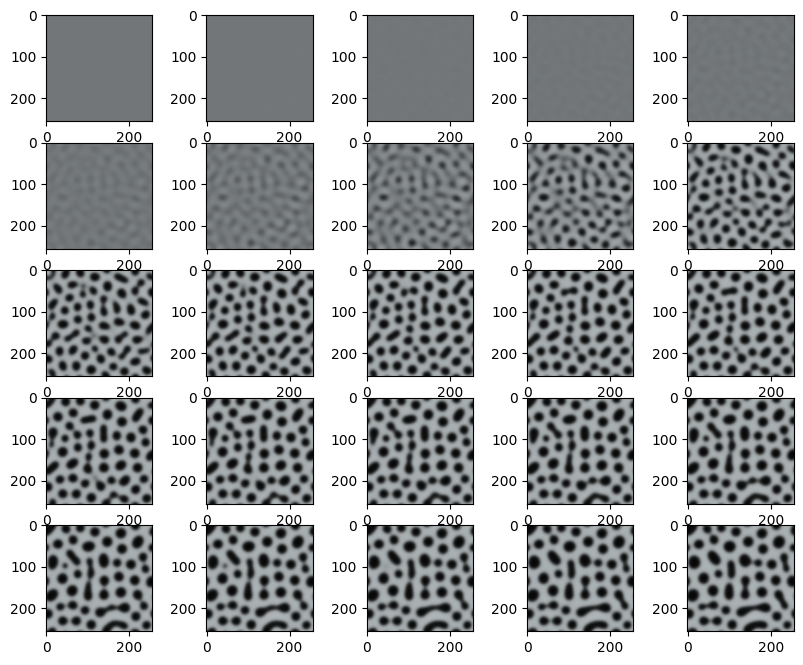

In [ ]:
X = glob.glob("/content/10comps_Fe_Cr/phase_field_data/0.4%_360/"+"*.png")
test_images_list = []
from tkinter import Tcl
X_sorted = Tcl().call('lsort', '-dict', X)

print(len(X_sorted))

from PIL import Image
test_images = []

for i,path in enumerate(X_sorted):
  image = cv2.imread(X_sorted[i])
  img = np.array(image)
  img = img.astype("float32") / 255.0
  test_images.append(img)

print(len(test_images))
# 1k images

# Converting to a numpy array
test_images = np.array(test_images)
print('Test images: ', test_images.shape)

X_test = test_images
print('X_test: ', X_test.shape)

#Make a separate Y_val for comparing the predicted images
Y_test = test_images
print('Y_test: ',Y_test.shape)

k=0
fig, axes = plt.subplots(5,5,figsize=(10,8))
for i in range(0,5):
  for j in range(0,5):
   axes[i,j].imshow(X_test[k])
   k = k+1




4/4 [==============================] - 1s 402ms/step


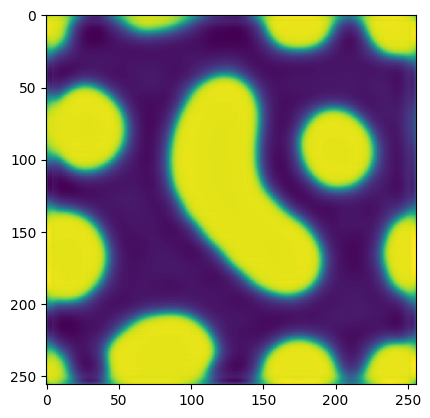

In [ ]:
#predictions

preds = model.predict(test_data)


# cv2_imshow(test_data[0])
plt.imshow(preds[0])
# plt.imshow(test_data[0])




In [ ]:
preds.shape

(3, 256, 256, 3)

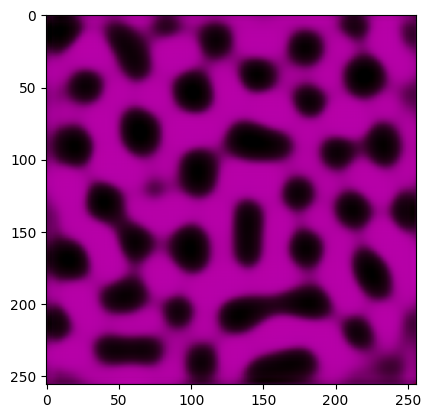

In [ ]:
plt.imshow(preds[30], cmap='gray')


In [ ]:
score = model.evaluate(preds, test_data)

ValueError: ignored

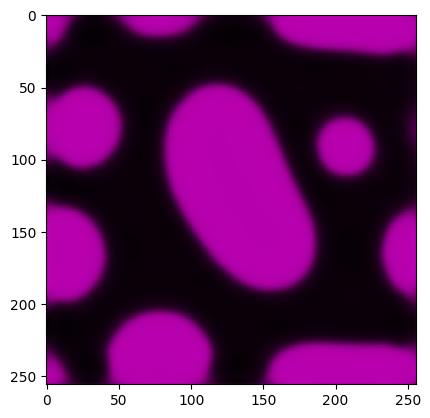

In [ ]:
plt.imshow(preds[50])

In [ ]:
# ******************************* Results *********************************

# First model = 84%
# Second model = 85.66% (validation), new activation - sinLU
# Third model = Trained Second model used on 0.45% + 0.55% data(additional 2k images) for 100 epochs more - bad accuracy
# Fourth model , 87%, activation = softmax, 64, 32,16 filters\
# Fifth Model, 86.67% val acc, activation = sigmoid, 64->32->16, Adam, 1k images (200-700), from 0.45% and 0.5% for 100 epochs
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

In [ ]:
# Heatma difference
# for 0.4% - at 0th, 50th and 100th time step
# for 0.5% - at 0th, 50th and 100th time step
# for 0.6% - at 0th, 50th and 100th time step

# **Heatmap difference between original and reconstructed image**

In [ ]:
X = glob.glob("/content/10comps_Fe_Cr/phase_field_data/0.4%_360/"+"*.png")
test_images_list = []
from tkinter import Tcl
X_sorted = Tcl().call('lsort', '-dict', X)
test_images_list.append(X_sorted[50])
test_images_list.append(X_sorted[100])
test_images_list.append(X_sorted[500])

In [ ]:

#Reshaping the image into proper input dormat for the autoencoder

from PIL import Image
test_images = []

for i,path in enumerate(test_images_list):
  image = cv2.imread(test_images_list[i])
  img = np.array(image)
  img = img.astype("float32") / 255.0
  test_images.append(img)

print(len(test_images))

3


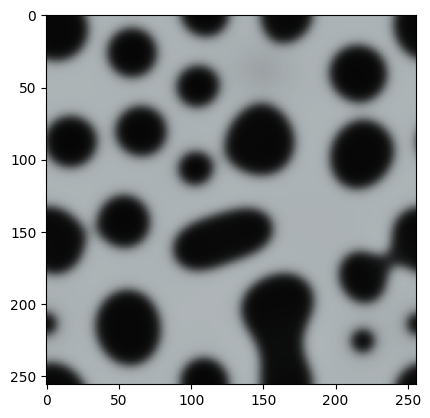

In [ ]:
img = cv2.imread(test_images_list[1])
plt.imshow(img)

test_images = np.array(test_images)

In [ ]:
print(test_images.shape)

(3, 256, 256, 3)


1/1 [==============================] - 0s 412ms/step
(3, 256, 256, 3)


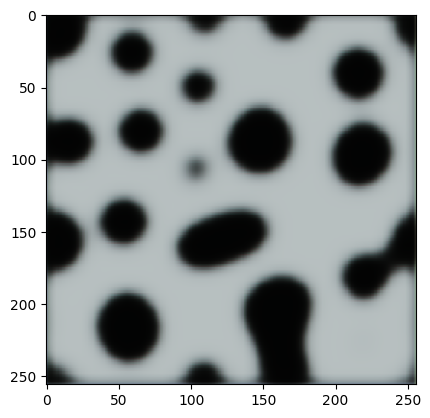

In [ ]:
#predictions

preds = model.predict(test_images)
print(preds.shape)
plt.imshow(preds[1])

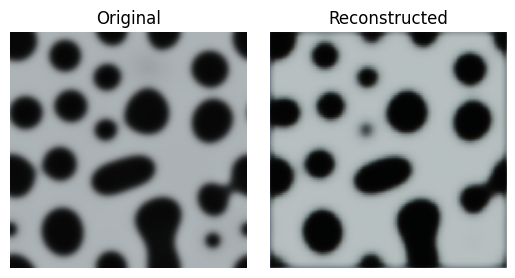

In [ ]:
import matplotlib.pyplot as plt

# Load the first image
image_1 = test_images[1]

# Load the second image
pred_img_1 = preds[1]

# Create a figure and subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot the first image in the first subplot
axes[0].imshow(image_1)
axes[0].set_title("Original")

# Plot the second image in the second subplot
axes[1].imshow(pred_img_1)
axes[1].set_title("Reconstructed")

# Remove the ticks and labels
for ax in axes:
    ax.axis("off")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)

# Show the figure
plt.show()


**Heatmap difference**

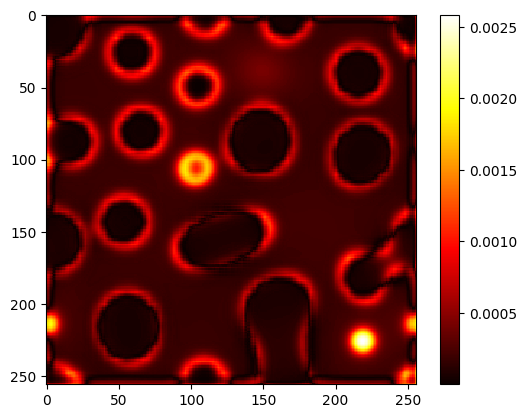

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


# Convert the NumPy arrays to TensorFlow tensors
image1 = tf.convert_to_tensor(image_1, dtype=tf.float32)
image2 = tf.convert_to_tensor(pred_img_1, dtype=tf.float32)

# Preprocess the images
image1 = tf.image.resize(image1, (256, 256)) / 255.0
image2 = tf.image.resize(image2, (256, 256)) / 255.0

# Calculate the absolute difference between the two images
difference = tf.abs(image1 - image2)

# Convert the difference tensor to grayscale
difference_gray = tf.image.rgb_to_grayscale(difference)

# Reshape the grayscale tensor to a 2D heatmap
heatmap = tf.reshape(difference_gray, (256,256))

# Visualize the heatmap
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


# **Generate heatmaps for every image**

In [ ]:
original_imgs = []
reconstructed_imgs = []
heatmaps = []
for i in range(0,3):
  original_imgs.append(test_images[i])
  reconstructed_imgs = preds

  # Convert the NumPy arrays to TensorFlow tensors
  image1 = tf.convert_to_tensor(test_images[i], dtype=tf.float32)
  image2 = tf.convert_to_tensor(preds[i], dtype=tf.float32)

  # Preprocess the images
  image1 = tf.image.resize(image1, (256, 256)) / 255.0
  image2 = tf.image.resize(image2, (256, 256)) / 255.0

  # Calculate the absolute difference between the two images
  difference = tf.abs(image1 - image2)

  # Convert the difference tensor to grayscale
  difference_gray = tf.image.rgb_to_grayscale(difference)

  # Reshape the grayscale tensor to a 2D heatmap
  heatmap = tf.reshape(difference_gray, (256,256))
  heatmaps.append(heatmap)



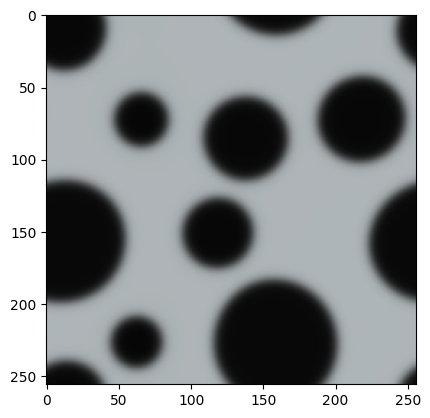

In [ ]:
plt.imshow(original_images[2])

# **0.4%**

3
(3, 256, 256, 3)
1/1 [==============================] - 1s 653ms/step
(3, 256, 256, 3)


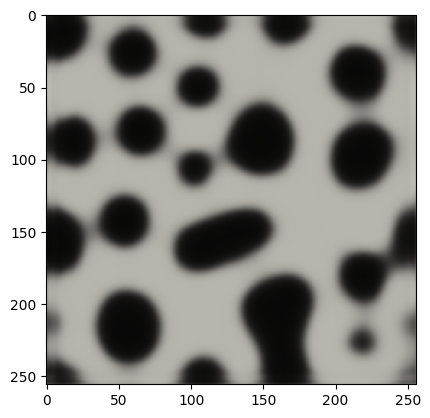

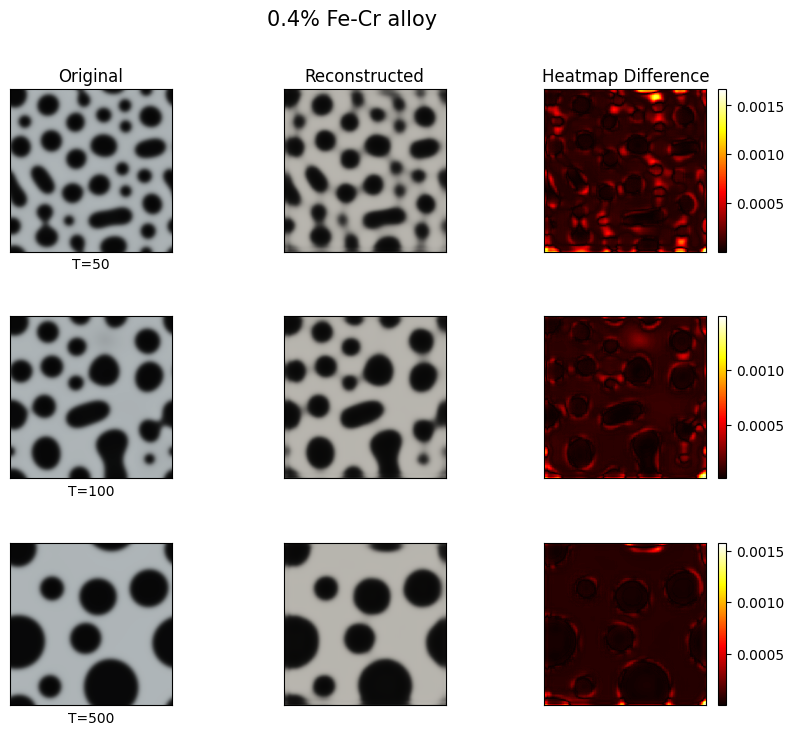

In [ ]:


X = glob.glob("/content/10comps_Fe_Cr/phase_field_data/0.4%_360/"+"*.png")
test_images_list = []
from tkinter import Tcl
X_sorted = Tcl().call('lsort', '-dict', X)
test_images_list.append(X_sorted[50])
test_images_list.append(X_sorted[100])
test_images_list.append(X_sorted[500])


#Reshaping the image into proper input dormat for the autoencoder

from PIL import Image
test_images = []

for i,path in enumerate(test_images_list):
  image = cv2.imread(test_images_list[i])
  img = np.array(image)
  img = img.astype("float32") / 255.0
  test_images.append(img)

print(len(test_images))

img = cv2.imread(test_images_list[1])
plt.imshow(img)

test_images = np.array(test_images)
print(test_images.shape)

#predictions

preds = model.predict(test_images)
print(preds.shape)
plt.imshow(preds[1])

original_imgs = []
reconstructed_imgs = []
heatmaps = []
for i in range(0,3):
  original_imgs.append(test_images[i])
  reconstructed_imgs = preds

  # Convert the NumPy arrays to TensorFlow tensors
  image1 = tf.convert_to_tensor(test_images[i], dtype=tf.float32)
  image2 = tf.convert_to_tensor(preds[i], dtype=tf.float32)

  # Preprocess the images
  image1 = tf.image.resize(image1, (256, 256)) / 255.0
  image2 = tf.image.resize(image2, (256, 256)) / 255.0

  # Calculate the absolute difference between the two images
  difference = tf.abs(image1 - image2)

  # Convert the difference tensor to grayscale
  difference_gray = tf.image.rgb_to_grayscale(difference)

  # Reshape the grayscale tensor to a 2D heatmap
  heatmap = tf.reshape(difference_gray, (256,256))
  heatmaps.append(heatmap)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])


# Generate random images for demonstration (replace with your own images)
original_images = test_images
reconstructed = preds

# Create a grid of subplots
fig, axs = plt.subplots(3,3,figsize=(10,8))

for ax in axs.flat:
    ax.label_outer()
# Display the images on the grid

for i in range(0,3):
  for j in range(0,3):
    if j==0 :
      h=axs[i,0].imshow(original_images[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])

    elif j==1 :
      h=axs[i,1].imshow(reconstructed[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    else:
      h = axs[i,2].imshow(heatmaps[i], cmap='hot', interpolation='nearest')
      fig.colorbar(h, ax=axs[i,2])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])


# Optional: Adjust spacing and remove axis labels
plt.subplots_adjust(hspace=0.4, wspace=0.2)



axs[0,0].set_xlabel('T=50')
axs[1,0].set_xlabel('T=100')
axs[2,0].set_xlabel('T=500')
# cbar = fig.colorbar(h, ax=axes[i,2])


fig.suptitle("0.4% Fe-Cr alloy", fontsize=15)
axs[0,0].title.set_text('Original')
axs[0,1].title.set_text('Reconstructed')
axs[0,2].title.set_text('Heatmap Difference')


plt.show()



# 0.6%

3
(3, 256, 256, 3)
1/1 [==============================] - 1s 657ms/step
(3, 256, 256, 3)


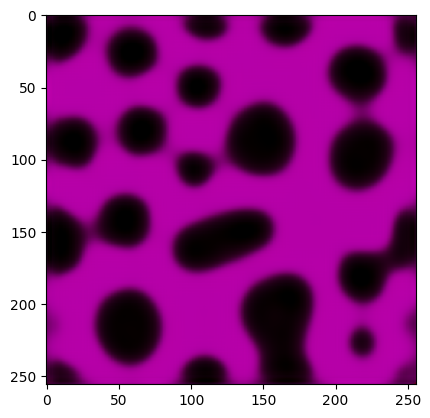

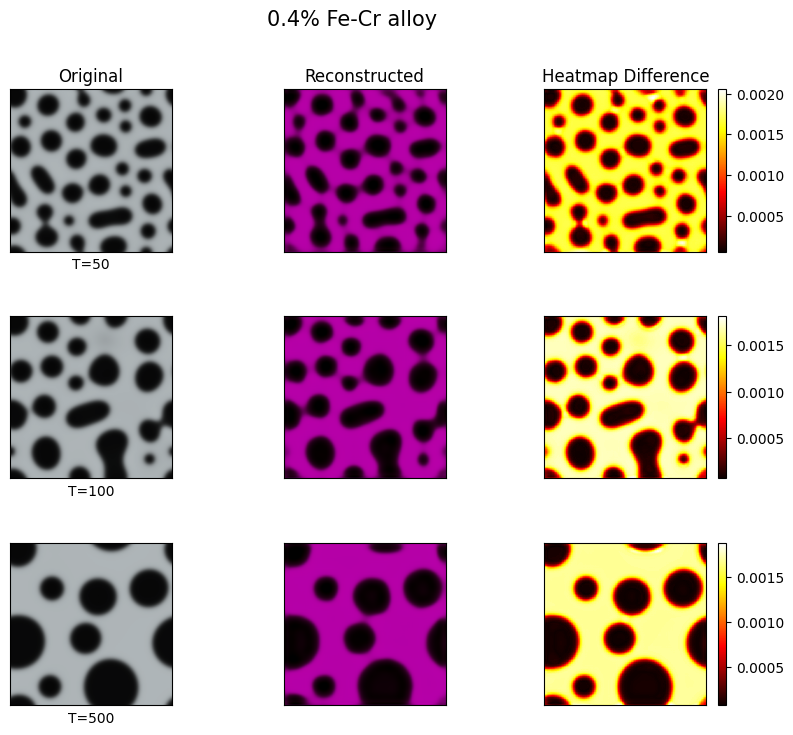

In [ ]:


X = glob.glob("/content/10comps_Fe_Cr/phase_field_data/0.4%_360/"+"*.png")
test_images_list = []
from tkinter import Tcl
X_sorted = Tcl().call('lsort', '-dict', X)
test_images_list.append(X_sorted[50])
test_images_list.append(X_sorted[100])
test_images_list.append(X_sorted[500])


#Reshaping the image into proper input dormat for the autoencoder

from PIL import Image
test_images = []

for i,path in enumerate(test_images_list):
  image = cv2.imread(test_images_list[i])
  img = np.array(image)
  img = img.astype("float32") / 255.0
  test_images.append(img)

print(len(test_images))

img = cv2.imread(test_images_list[1])
plt.imshow(img)

test_images = np.array(test_images)
print(test_images.shape)

#predictions

preds = model.predict(test_images)
print(preds.shape)
plt.imshow(preds[1])

original_imgs = []
reconstructed_imgs = []
heatmaps = []
for i in range(0,3):
  original_imgs.append(test_images[i])
  reconstructed_imgs = preds

  # Convert the NumPy arrays to TensorFlow tensors
  image1 = tf.convert_to_tensor(test_images[i], dtype=tf.float32)
  image2 = tf.convert_to_tensor(preds[i], dtype=tf.float32)

  # Preprocess the images
  image1 = tf.image.resize(image1, (256, 256)) / 255.0
  image2 = tf.image.resize(image2, (256, 256)) / 255.0

  # Calculate the absolute difference between the two images
  difference = tf.abs(image1 - image2)

  # Convert the difference tensor to grayscale
  difference_gray = tf.image.rgb_to_grayscale(difference)

  # Reshape the grayscale tensor to a 2D heatmap
  heatmap = tf.reshape(difference_gray, (256,256))
  heatmaps.append(heatmap)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])


# Generate random images for demonstration (replace with your own images)
original_images = test_images
reconstructed = preds

# Create a grid of subplots
fig, axs = plt.subplots(3,3,figsize=(10,8))

for ax in axs.flat:
    ax.label_outer()
# Display the images on the grid

for i in range(0,3):
  for j in range(0,3):
    if j==0 :
      h=axs[i,0].imshow(original_images[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])

    elif j==1 :
      h=axs[i,1].imshow(reconstructed[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    else:
      h = axs[i,2].imshow(heatmaps[i], cmap='hot', interpolation='nearest')
      fig.colorbar(h, ax=axs[i,2])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])


# Optional: Adjust spacing and remove axis labels
plt.subplots_adjust(hspace=0.4, wspace=0.2)



axs[0,0].set_xlabel('T=50')
axs[1,0].set_xlabel('T=100')
axs[2,0].set_xlabel('T=500')
# cbar = fig.colorbar(h, ax=axes[i,2])


fig.suptitle("0.4% Fe-Cr alloy", fontsize=15)
axs[0,0].title.set_text('Original')
axs[0,1].title.set_text('Reconstructed')
axs[0,2].title.set_text('Heatmap Difference')


plt.show()



# **0.35%**

3
(3, 256, 256, 3)
1/1 [==============================] - 0s 266ms/step
(3, 256, 256, 3)


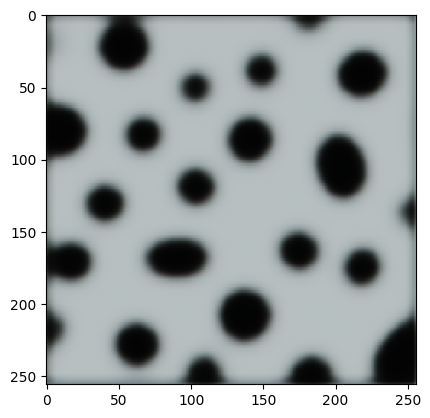

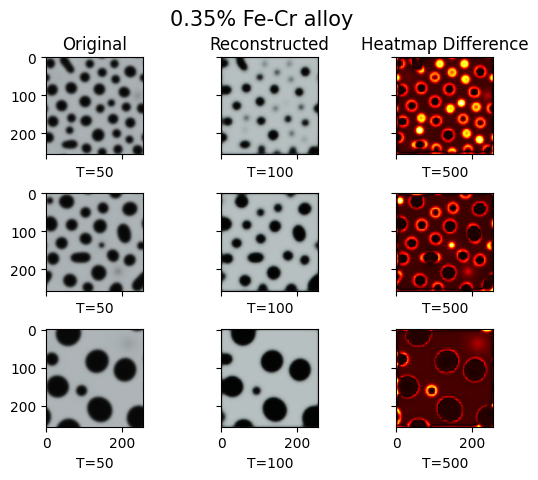

In [ ]:


X = glob.glob("/content/10comps_Fe_Cr/phase_field_data/0.35%_360/"+"*.png")
test_images_list = []
from tkinter import Tcl
X_sorted = Tcl().call('lsort', '-dict', X)
test_images_list.append(X_sorted[50])
test_images_list.append(X_sorted[100])
test_images_list.append(X_sorted[500])


#Reshaping the image into proper input dormat for the autoencoder

from PIL import Image
test_images = []

for i,path in enumerate(test_images_list):
  image = cv2.imread(test_images_list[i])
  img = np.array(image)
  img = img.astype("float32") / 255.0
  test_images.append(img)

print(len(test_images))

img = cv2.imread(test_images_list[1])
plt.imshow(img)

test_images = np.array(test_images)
print(test_images.shape)

#predictions

preds = model.predict(test_images)
print(preds.shape)
plt.imshow(preds[1])

original_imgs = []
reconstructed_imgs = []
heatmaps = []
for i in range(0,3):
  original_imgs.append(test_images[i])
  reconstructed_imgs = preds

  # Convert the NumPy arrays to TensorFlow tensors
  image1 = tf.convert_to_tensor(test_images[i], dtype=tf.float32)
  image2 = tf.convert_to_tensor(preds[i], dtype=tf.float32)

  # Preprocess the images
  image1 = tf.image.resize(image1, (256, 256)) / 255.0
  image2 = tf.image.resize(image2, (256, 256)) / 255.0

  # Calculate the absolute difference between the two images
  difference = tf.abs(image1 - image2)

  # Convert the difference tensor to grayscale
  difference_gray = tf.image.rgb_to_grayscale(difference)

  # Reshape the grayscale tensor to a 2D heatmap
  heatmap = tf.reshape(difference_gray, (256,256))
  heatmaps.append(heatmap)

import matplotlib.pyplot as plt
import numpy as np


# Generate random images for demonstration (replace with your own images)
original_images = test_images
reconstructed = preds

# Create a grid of subplots
fig, axs = plt.subplots(3,3)
for ax in axs.flat:
    ax.label_outer()
# Display the images on the grid

for i in range(0,3):
  for j in range(0,3):
    if j==0 :
      axs[i,0].imshow(original_images[i])
      axs[i,0].set_xlabel('T=50')

    if j==1 :
      axs[i,1].imshow(reconstructed[i])
      axs[i,1].set_xlabel('T=100')

    else:
      axs[i,2].imshow(heatmaps[i], cmap='hot', interpolation='nearest')
      axs[i,2].set_xlabel('T=500')


# Optional: Adjust spacing and remove axis labels
plt.subplots_adjust(hspace=0.4, wspace=0.2)






fig.suptitle("0.35% Fe-Cr alloy", fontsize=15)
axs[0,0].title.set_text('Original')
axs[0,1].title.set_text('Reconstructed')
axs[0,2].title.set_text('Heatmap Difference')
# Show the grid of images
# cbar = plt.colorbar(orientation='horizontal')

plt.show()

